In [223]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [224]:
#mendownload data file zip
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-29 10:42:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  24.2MB/s    in 12s     

2020-07-29 10:42:32 (25.1 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [225]:
# melakkukan ekstrak file zip
import zipfile
import os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [226]:
os.listdir('/tmp/rockpaperscissors')

['paper', 'scissors', 'rps-cv-images', 'rock', 'README_rpc-cv-images.txt']

In [227]:
#jumlah gambar di folder paper
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [228]:
#jumlah gambar di folder rock
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [229]:
#jumlah gambar di folder scissors
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [230]:
# membuat nama direktori
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [231]:
paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir,'rock')
scissors_dir = os.path.join(base_dir, 'scissors')

In [232]:
# memecah folder paper menjadi data train dan data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)

# memecah folder rock menjadi data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2)

# memecah folder scissors menjadi data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)

In [233]:
print(len(train_paper_dir))
print(len(train_rock_dir))
print(len(train_scissors_dir))
print(len(val_paper_dir))
print(len(val_rock_dir))
print(len(val_scissors_dir))

569
580
600
143
146
150


In [234]:
#image data generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        horizontal_flip=True,
        shear_range = 0.2,
        fill_mode = 'wrap',
        validation_split=0.2)

test_datagen = ImageDataGenerator(
        rescale = 1./225,
        rotation_range = 20,
        horizontal_flip = True,
        shear_range = 0.2,
        fill_mode = 'wrap')

In [235]:
#trainset dan validation
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150), 
        #class_mode='sparse',
        shuffle=True,
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        #class_mode='sparse',
        subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [236]:
#membuat model squential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 74, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 17, 64)       

In [237]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [238]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [239]:
callbacks = myCallback()
history = model.fit(
          train_generator,
          steps_per_epoch = 20,
          epochs = 20,
          validation_data = validation_generator,
          validation_steps = 8,
          verbose = 2,
          callbacks = [callbacks]
          )

Epoch 1/20
20/20 - 14s - loss: 1.1565 - accuracy: 0.3613 - val_loss: 1.0775 - val_accuracy: 0.7031
Epoch 2/20
20/20 - 14s - loss: 0.9493 - accuracy: 0.6016 - val_loss: 0.7509 - val_accuracy: 0.7773
Epoch 3/20
20/20 - 14s - loss: 0.6302 - accuracy: 0.7401 - val_loss: 0.5311 - val_accuracy: 0.8320
Epoch 4/20
20/20 - 14s - loss: 0.4134 - accuracy: 0.8516 - val_loss: 0.3667 - val_accuracy: 0.8672
Epoch 5/20
20/20 - 14s - loss: 0.3506 - accuracy: 0.8813 - val_loss: 0.3206 - val_accuracy: 0.8906
Epoch 6/20
20/20 - 14s - loss: 0.2288 - accuracy: 0.9266 - val_loss: 0.1909 - val_accuracy: 0.9336
Epoch 7/20
20/20 - 14s - loss: 0.2248 - accuracy: 0.9223 - val_loss: 0.1854 - val_accuracy: 0.9414
Epoch 8/20
20/20 - 14s - loss: 0.1646 - accuracy: 0.9556 - val_loss: 0.1509 - val_accuracy: 0.9453
Epoch 9/20
20/20 - 14s - loss: 0.1170 - accuracy: 0.9731 - val_loss: 0.1481 - val_accuracy: 0.9375
Epoch 10/20
20/20 - 14s - loss: 0.0952 - accuracy: 0.9672 - val_loss: 0.0998 - val_accuracy: 0.9688
Epoch 11/

In [240]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

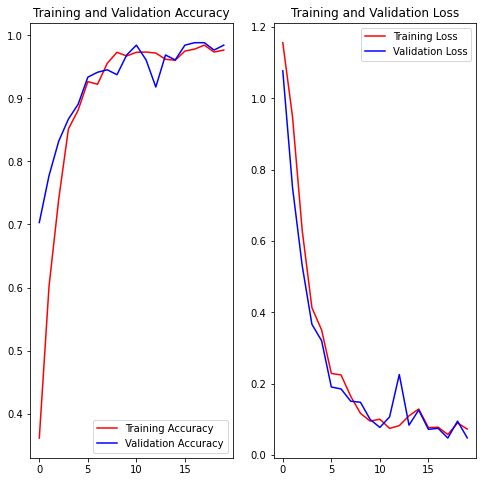

In [241]:
#menampilkan plot accuracy & loss model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'r', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'r', label='Training Loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving gunting.jpg to gunting (4).jpg
gunting.jpg
scissors


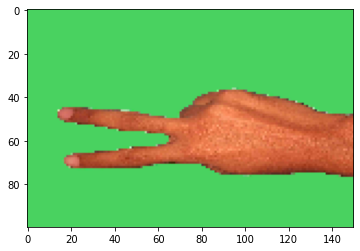

In [242]:
#memprediksi gambar yang akan diunggah
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')